# Task A4 – Stochastic model

# History of the stochastic model for epidemiology
An early stochastic model for epidemics was proposed by A.G. McKendrick in 1926 which is before he worked with Kermack in 1928 on deterministic models in epidemiology. This is somewhat surprising given that the deterministic model is in theory much simpler as it assumes that the same amount of time passes before each event whereas the stochastic model allows for variation in this length.  Advancements on McKendrick’s model were made in 1928 by Green and Frost and in 1931 by Greenwood who both proposed discrete time stochastic models. After this, Bartlett studied a continuous time stochastic SIR model much like the one we use in our investigation.  The exact stochastic SIR model we use is based on the Gillespie Direct Method created by Dan Gillespie in 1977 to model chemical and biochemical reaction systems efficiently with limited computational power. This method is also referred to as the Stochastic Simulation Algorithm (Greenwood, P. and Gordillo, L., n.d.).


# Our use of the stochastic model 
In our stochastic model, we assume that events occur at exponentially distributed time intervals so the time until the next event follows an exponential distribution with rate parameter $$\beta SI\ +\ \mu I$$ . The probability that the next event is an infection is $$\frac{\beta IS}{\beta IS\ +\ \mu I}$$ and similarly the probability of removal is $$\frac{\mu I}{\beta SI\ +\ \mu I}$$ . 
The method involves generating two random variables r1,r2 from a uniform 0,1 distribution , then we calculate the time of the next event from an exponential distribution 
$$ t\ =\ t\ +\ \frac{1}{\beta IS\ +\ \mu I}\ln\left(\frac{1}{r_{1}}\right)$$  
Then we choose whether the next event is an infection or a removal. If 
$$r_{2}<\frac{\beta IS}{\beta IS\ +\ \mu I}$$ 
then the next event is an infection so set S=S-1 and I=I+1, otherwise set I=I-1 and R=R+1. This process is repeated while the outbreak is ongoing (i.e while I>0). 

This model more accurately reflects the randomness involved in social interactions, which is key to monitoring the spread of any disease as most tend to be transmitted through touch, air or water, than the deterministic model. Therefore, in many cases, predictions based on a stochastic model of this type will be more accurate than predictions drawn from a deterministic model. 


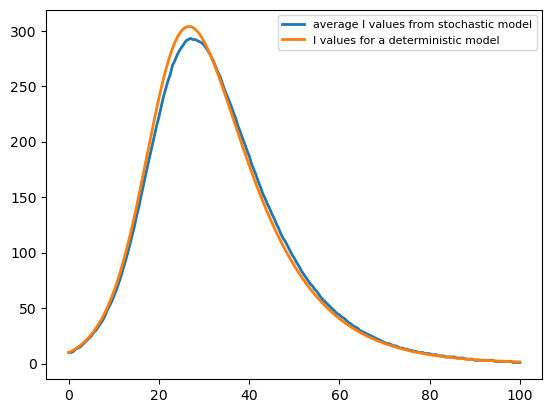

In [1]:
## import necessary functions from their respective libraries
import numpy as np 
import matplotlib.pyplot as plt 
import statistics as stat 
from scipy.integrate import odeint 
tVals = np.array([i*0.5 for i in range(201)])
def sSIR(): 
    # Parameter values
    beta = 3.0*10**-4
    mu = 0.1
    
    
    # Set up an array to record pre-determined times and values of I at those times
    tVals = np.array([i*0.5 for i in range(201)])
    IVals = np.array([0 for i in range(201)])
    
    # Set initial conditions and the initial time
    S = 10**3 - 10
    I = 10
    R = 0
    t = 0
    
    IVals[0] = I
    
    
    # --- While the outbreak is ongoing (I > 0), generate events --- #
      
    while I > 0:
        
        previous_time = t
        
        r1 = np.random.uniform(0, 1, 1)
        totalRate = beta*I*S + mu*I
        t = t + (1/totalRate)*np.log(1/r1)
        
        new_time = t
        
        for i in range(201):
            if previous_time < tVals[i] < new_time:
                IVals[i] = I
        
        r2 = np.random.uniform(0, 1, 1)
        if r2 < beta*I*S/totalRate:
            S = S - 1
            I = I + 1
        else:
            I = I - 1
            R = R + 1
    return(IVals) 
## generates a matrix containing 100 iterations of the stochastic SIR model
IVals_matrix = np.zeros([100,201]) 
for i in range(100): 
    IVals_matrix[i,:] = sSIR() 
## finds the average value of I across these 100 simulations at each t=0,0.5,1,...
av_Ivals = np.array([0 for i in range(201)]) 
for i in range(201): 
    av_Ivals[i] = stat.mean(IVals_matrix[:,i]) 

## Creates an analagous solution to the detrministic SIR model
def SIR(y, t):
    # returns RHS of the SIR model
    S, I, R = y

    beta = 3*(10**-4)
    mu = 0.1
    
    N = S + I + R
    Sdot = -beta * S * I
    Idot = beta * S * I - mu * I
    Rdot = mu * I
    
    return Sdot, Idot, Rdot

S0 = 10**3 - 10
I0 = 10
R0 = 0
y0 = np.array([S0, I0, R0]) 
y_sol = odeint(SIR, y0, tVals) 
I = y_sol[:,1] 
## plots the evolution of I averaged over 100 stochastic simulations and a deterministic prediction
plt.plot(tVals,av_Ivals, lw = 2 , label = "average I values from stochastic model") 
plt.plot(tVals, I, lw = 2, label = "I values for a deterministic model")  
plt.legend(fontsize = 8)
plt.show()

An interesting observation that we made in our investigation is that when you run one simulation of the stochastic SIR model and plot the evolution of I over time, there are many spikes, and it tends to deviate from the curve for I(t) given by solving an analogous deterministic model. However, if you run 100 simulations of the stochastic model and plot the evolution of the average I values over time, it generates a curve which is very similar to that given by the deterministic model which is shown in the above graph. 

The curves for the averaged I values from 100 stochastic simulations and for the I values generated by a deterministic model are almost completely identical and differ only in the fact that the deterministic model predicts a slightly higher peak of the number of infected individuals. Also it is interesting to note that both models predict that the peak number of infected individuals will occur around 30 days into the outbreak. So it would appear that similar predictions arise from the two models despite their obvious differences. 

# A recent use of the stochastic model 
A very recent example of the use of a stochastic SIR model is the use of a slightly more involved model to predict the evolution of COVID-19 pandemics in municipalities (countries with small populations). The model is a reinterpretation of a classical SIR model which interprets infectious diseases as chemical processes governed by the Chemical Master Equations (CME) and uses the SSA. The model is then modified further by including a variable infection rate in order to capture a turning point in the pandemic’s evolution and also uses an SIR model with jumps to allow for the possibility for various people to get infected at the same time for one infected individual. The model was effective at predicting the evolution of COVID-19 in several municipalities in the Northwest of the Iberian Peninsula. (Pájaro, M., Fajar, N.M., Alonso, A.A. and Otero-Muras, I. , 2022)

# References: 
- •	Greenwood, P. and Gordillo, L. (n.d.). Stochastic Epidemic Modelling. [online] Available at: https://aimath.org/WWN/populationmodel/chapmar25.pdf [Accessed 19 Mar. 2025].
- •	Pájaro, M., Fajar, N.M., Alonso, A.A. and Otero-Muras, I. (2022). Stochastic SIR model predicts the evolution of COVID-19 epidemics from public health and wastewater data in small and medium-sized municipalities: A one year study. Chaos, Solitons & Fractals, [online] 164, p.112671. doi:https://doi.org/10.1016/j.chaos.2022.112671.